In [ ]:
%tensorflow_version 2.8.0
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

import keras
keras.__version__

import numpy as np

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.8.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


# Classifying newswires: a multi-class classification example

In this project, I will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many 
classes, this problem is an instance of "multi-class classification", and since each data point should be classified into only one 
category, the problem is more specifically an instance of "single-label, multi-class classification".

## The Reuters dataset


I will be working with the _Reuters dataset_, a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, 
widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each 
topic has at least 10 examples in the training set.

The Reuters dataset comes packaged as part of Keras. Let's take a look right away:

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step



The argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the 
data.

We have 8,982 training examples and 2,246 test examples:

Each example is a list of integers (word indices):

In [ ]:
train_data[:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

Here's how to decode it back to words:

In [ ]:
word_index = reuters.get_word_index()
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([inverted_word_index.get(i - 3, '?') for i in train_data[0]])

print("The decoded text:" + decoded_newswire)

565248/550378 [==============================] - 0s 0us/step
The decoded text:? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


The label associated with an example is an integer between 0 and 45: a topic index.

In [ ]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

## Preparing the data

To vectorize the data we do:

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


Using "one-hot" encoding to vectorize the labels. One-hot encoding consists in embedding each label as an all-zero vector with a 1 in the place of the label index.

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building our network



In [ ]:
from keras import models
from keras import layers

# Specifying the architecture of the model.
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=46, activation='softmax'))

In [ ]:
# Compiling the model 
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Validating 

Setting apart 1,000 samples in our training data to use as a validation set:

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training network for 20 epochs:

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    validation_data=(x_val,y_val)
)

Epoch 1/20
250/250 [==============================] - 4s 11ms/step - loss: 1.4412 - accuracy: 0.6865 - val_loss: 1.0806 - val_accuracy: 0.7440
Epoch 2/20
250/250 [==============================] - 3s 11ms/step - loss: 0.7366 - accuracy: 0.8346 - val_loss: 0.8803 - val_accuracy: 0.8200
Epoch 3/20
250/250 [==============================] - 3s 11ms/step - loss: 0.4581 - accuracy: 0.8979 - val_loss: 0.8894 - val_accuracy: 0.8110
Epoch 4/20
250/250 [==============================] - 3s 11ms/step - loss: 0.3190 - accuracy: 0.9313 - val_loss: 0.9371 - val_accuracy: 0.8160
Epoch 5/20
250/250 [==============================] - 3s 11ms/step - loss: 0.2453 - accuracy: 0.9422 - val_loss: 1.0159 - val_accuracy: 0.8230
Epoch 6/20
250/250 [==============================] - 3s 11ms/step - loss: 0.2078 - accuracy: 0.9494 - val_loss: 1.0700 - val_accuracy: 0.8120
Epoch 7/20
250/250 [==============================] - 3s 10ms/step - loss: 0.1896 - accuracy: 0.9518 - val_loss: 1.1457 - val_accuracy: 0.8070

In order to dentify when it starts to overfit:

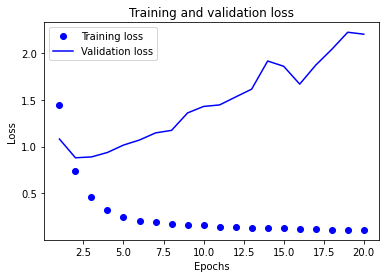

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

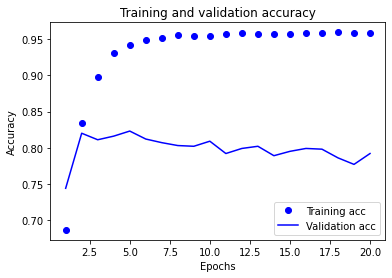

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Training a new network from scratch for fewer epochs before it starts overfitting:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    validation_data=(x_val,y_val)
)

Epoch 1/4
250/250 [==============================] - 4s 12ms/step - loss: 1.4625 - accuracy: 0.6794 - val_loss: 1.0698 - val_accuracy: 0.7560
Epoch 2/4
250/250 [==============================] - 3s 11ms/step - loss: 0.7595 - accuracy: 0.8299 - val_loss: 0.8877 - val_accuracy: 0.8070
Epoch 3/4
250/250 [==============================] - 3s 13ms/step - loss: 0.4761 - accuracy: 0.8955 - val_loss: 0.8603 - val_accuracy: 0.8230
Epoch 4/4
250/250 [==============================] - 3s 11ms/step - loss: 0.3223 - accuracy: 0.9305 - val_loss: 0.9243 - val_accuracy: 0.8220


## Generating predictions on new data



In [ ]:
model.predict(x_test)

array([[3.95909228e-06, 1.30647939e-04, 7.26927780e-08, ...,
        4.29849223e-08, 7.35299068e-07, 9.88626283e-08],
       [5.03075626e-08, 3.10173277e-02, 1.83921129e-05, ...,
        1.45640826e-11, 5.21126424e-07, 3.93142019e-10],
       [2.13406951e-04, 9.61874008e-01, 1.66271185e-03, ...,
        1.89649188e-06, 1.53884703e-05, 1.11890367e-04],
       ...,
       [1.48091078e-06, 3.73345043e-04, 4.67977713e-07, ...,
        1.58046749e-08, 1.49457105e-06, 1.50465993e-07],
       [3.42369254e-04, 1.67923812e-02, 7.44139485e-04, ...,
        8.17145119e-05, 4.58555500e-04, 1.00535886e-04],
       [8.64663980e-06, 9.33085859e-01, 8.18499888e-04, ...,
        4.73574460e-08, 4.56577400e-05, 3.80688221e-06]], dtype=float32)

Each entry in `predictions` is a vector of length 46. **The** largest entry is the predicted class, i.e. the class with the highest probability:

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 4ms/step - loss: 1.0318 - accuracy: 0.7970
[1.0317891836166382, 0.796972393989563]



## We can observe that our model gets almost an accuracy of 80% on new data, which is considerably good!

